# [Title]

## 1. Introduction

In [1]:
import matplotlib.pyplot as plt
#plt.style.use('seaborn')
#%matplotlib inline
import pandas as pd
from cobra.io import read_sbml_model
import escher

In [3]:
# A test from assignment 4
model = read_sbml_model('data/iML1515.xml')
escher.list_available_maps()
escher.Builder('e_coli_core.Core metabolism')

Builder()

### 1.1 Literature review of the compound (<500 words)


Hej

### 1.2 Literature review of the cell factory (<500 words)
jenni lugter hallo hAllo

## 2. Problem definition (<300 words)


## 3.  Selection and assessment of existing GSM (<500 words)


#### Performance comparison with MEMOTE
|S.cerevisiae model|Total reactions|Total metabolites|Total compartments|Total Genes|Metabolic coverage|Total score(%)|Consistency score (%)|Annotation-metabolic score(%)|Annotation-reaction score (%)|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|iMM904| 1577 | 1226 | 8 | 905 | 1.74 | 81 | 85 | 80 | 82 |
|iND750| 1266 | 1059 | 8 | 750 | 1.69 | 81 | 85 | 80 | 83 |



## 4. Computer-Aided Cell Factory Engineering (<1500 words)

<font size="5"> Indtroduction </font>

<font size="5"> Media optimization </font>
<br>

|  | Defualt |YEPD (succrose)|
|:-:|:-:|:-:|
|Maximum Theoretical Biomass Productivity (h-1)| 0.288 | 1.307 |
|Maximum Theoretical Productivity of AA  (mmol * gDW-1 h-1)| 0.833 | 2.000 |
| Maximum Theoretical Yield (mmol-AA * mmol-carbon-1) | 0.0833 | 0.0465 |

Phenotypic phase planes 

In [9]:



from PIL import Image
img1 = Image.open("Analysis\Pictures\biomass_glucose.png")
display(img1)
img2 = Image.open("Analysis\Pictures\AA_GLC.png")
display(img2)




OSError: [Errno 22] Invalid argument: 'Analysis\\Pictures\x08iomass_glucose.png'

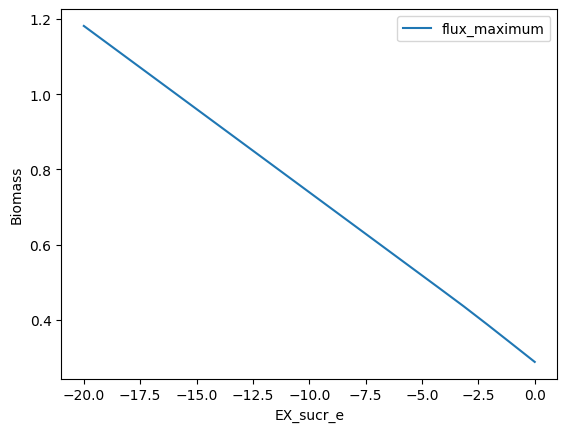

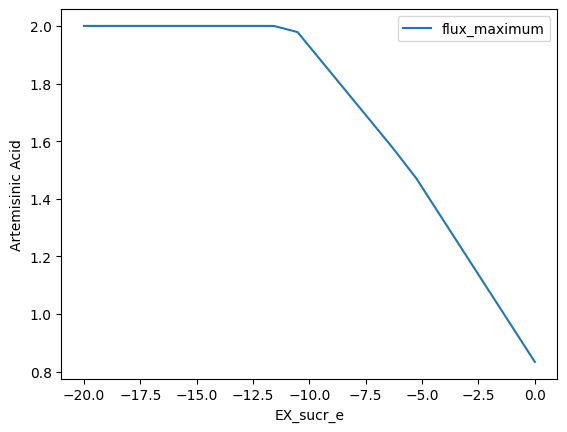

In [3]:
from PIL import Image
img3 = Image.open("Analysis\Pictures\Biomass_sucr.png")
display(img3)
from PIL import Image
img4= Image.open("Analysis\Pictures\AA_sucr.png")
display(img4)

<font size="5"> Regulation targerts </font>

A way to optimize a cell factory is to regulate the genes and to do that flux scanning has been done. Flux scanning is based on enforced objective flux (FSEOF), which enables it to identify gene amplification targets. FSEOF found 36 possible targets for gene regulation which are represented by a negative and a positive sign for flux decrease or increase. 

From the FSEOF analysis a top 15 list of upregulated target genes for artemisinic acid production is shown in the table below.  

|Genes|Function|Reaction|
|:-:|:-:|:-:|
| SPMDtex2 | Spermidine excretion cytosol to extracellular | Spermidine _c ⇌ Spermidine _e |
|SPMDt3i| Spermidine transport in via proton antiport | H+_c + Spermidine_e ⇌ Spermidine_c + H+_e |
| PYRt2m | Pyruvate mitochondrial transport via proton symport | H+_c + pyruvat_c ⇌ H+_m + pyr_m |
| PDHm | Pyruvate dehydrogenase | CoA + NAD + pyruvat ⇌ Acetyl-CoA + co2 + nadh |
| HCO3E | HCO3 equilibration reaction | CO2 + H2O ⇌ H+ + HCO3**- |
| PC | Pyruvate carboxylase | ATP + HCO3- + Pyruvate ⇌ ADP +  H+ +  Oxaloacetate + phosphate |
| OAAt2m | Oxaloacetate transport mitochondrial | H+ + Oxaloacetate ⇌ H+ + Oxaloacetate |
| ACACT1m | Acetyl CoA C acetyltransferase mitochondrial | 2.0 Acetyl-CoA ⇌ Acetoacetyl-CoA + CoA |
| PMEVK | Phosphomevalonate kinase | ATP + (R)-5-phosphomevalonate⇌ ADP + (R)-5-Diphosphomevalonate |
| DPMVD | Diphosphomevalonate decarboxylase | ATP + (R)-5-diphosphomevalonate ⇌ ADP + phosphate + isopentenyl diphosphate + CO2 |
| COAtim | CoA transporter mitochondrial irreversible | CoA_c ⇌ CoA_m |
| MEVK1 | Mevalonate kinase atp | ATP + (R)-mevalonate ⇌ ADP + H+ + (R)-5-phosphomevalonate |
| GRTT | Geranyltranstransferase | Geranyl diphosphate + isopentenyl diphosphate ⇌ diphosphate + farnesyl diphosphate (also known as Farnesyl pyrophosphate (FPP)) |
| DMATT | Dimethylallyltranstransferase | Dimethylallyl diphosphate + Isopentenyl diphosphate ⇌ Geranyl diphosphate + diphosphate |
| IPDDI | Isopentenyl-diphosphate D-isomerase | Isopentenyl diphosphate ⇌ Dimethylallyl diphosphate |

The two first genes of the up-regulation target code are involved in spermindine transport. We could however not find a reason for this upregulation. PYRt2m, PDHm, HCO3E, PC, OAAt2m, ACACT1m and COAtim are involved in increasing the flux to the mitochondria which increase production of Acetyl-CoA through TCA. This in turn increases flux to the mevalonate (MVA) isoprenoid biosynthesis. In this pathway the genes PMEVK, DPMVD, MEVK1, GRTT, DMATT and IPDDI are also targeted for up-regulation. This pathway produces farnesyl diphosphate (also known as Farnesyl pyrophosphate (FPP)), which is the precursor for the heterologous pathway inserted into the organism, so upregulation of these genes makes sense. 



<font size="5"> FBA </font>

<font size="5"> Regulation targerts </font>
<br>
To identify possible knockouts for improving the production of artemisinic acid we used Optgene and Optknock as well as single found from the litterature and double gene knockouts done with cobra flux analysis.   

<br><font size="3">The results of Optgene can be seen in file 06_optgene.ipynb and it shows that no knockouts can be made to increase prodution of artemisinic acid. Since running Optgene did not result in any knockouts Optknock is used. After running Optknock multiple times for 8000+ minuts and changing parameters mutiple times and still got no results, we decided to move on to manual knockouts such as single and double knockouts.
<br><font size="3"> Single knockouts </font>
<br>
The single knockouts  (HEX,SBTR,SBTD_D2,PGCD,PSP_L,ALATA_L,CITtcm,ICDHxm) was found from (https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0112615) and they can be seen in 06.3_Knockouts.ipynb. The table below sumerises the single knockouts made.

|Genes|Maximum AA productivity|Maximum theoretical yield|
|:-:|:-:|:-:|
| HEX | 1.44 | 0.144 |
| SBTR | 1.44 | 0.144 |
| SBTD_D2 | 1.44 | 0.144 |
| PGCD | 1.44 | 0.144 |
| PSP_L | 1.44 | 0.144 |
| ALATA_L | 1.44 | 0.144 |
| CITtcm | 1.44 | 0.144 |
| ICDHxm | 1.44 | 0.144 |
| ATPM | 1.47 | 0.147 |

As seen all the single knocouts gotten from the litterature did not result in and increase in production of artesimic acid. However when using cobra.flux_analysis to identify possible single gene knockouts the gene ATPM showed an increase in artesimic aacid productivety when knockout. This it due to ATPM being a futile reaction consuming unesserary ATP, therfor when knocked out the productivety increases due to more ATP being avalible. 
<br>
<br><font size="3"> Double </font>
<br>

<font size="5"> Cofactor swap </font>

## 5. Discussion (<500 words)

## 6. Conclusion (<200 words)

## References